In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

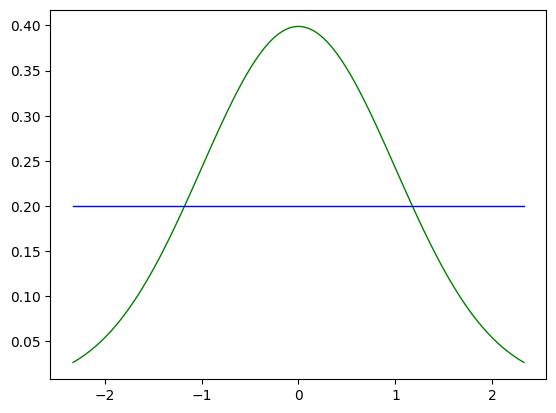

In [137]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'g-', lw=1, alpha=1)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

In [174]:
df = pd.read_csv("data/TCL_wt1.tsv", sep='\t', na_values="#VALEUR!", dtype={"Accession" : np.string_})
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.dtypes

Accession                                                        object
Description                                                      object
Gene Symbol                                                      object
Corrected Abundance ratio (1.53)                                float64
Log2 Corrected Abundance Ratio                                  float64
Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)    float64
-LOG10 Adj.P-val                                                float64
dtype: object

In [175]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1989-10-01" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary" evidence="1">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" 

In [176]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1993-07-01" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

In [177]:
values = df[['Description', 'Gene Symbol']]
values

,Description,Gene Symbol
0,Basal-body rod modification protein FlgD OS=Es...,flgD
1,Uncharacterized protein YeaC OS=Escherichia co...,yeaC
2,Flagellar transcriptional regulator FlhD OS=Es...,flhD
3,PTS system glucitol/sorbitol-specific EIIA com...,srlB
4,Flagellar hook-associated protein 3 OS=Escheri...,flgL
...,...,...
1741,Prophage lipoprotein Bor homolog OS=Escherichi...,borD
1742,Outer membrane protein TolC OS=Escherichia col...,tolC
1743,Outer membrane protein X OS=Escherichia coli (...,ompX
1744,Outer membrane protein F OS=Escherichia coli (...,ompF


In [178]:
df.iloc[0:5,[0, 2, 3]]

,Accession,Gene Symbol,Corrected Abundance ratio (1.53)
0,P75936,flgD,0.075817
1,P76231,yeaC,0.092810
2,P0A8S9,flhD,0.102614
3,P05706,srlB,0.108497
4,P29744,flgL,0.124183


In [184]:
log2 = df["Log2 Corrected Abundance Ratio"].tolist()

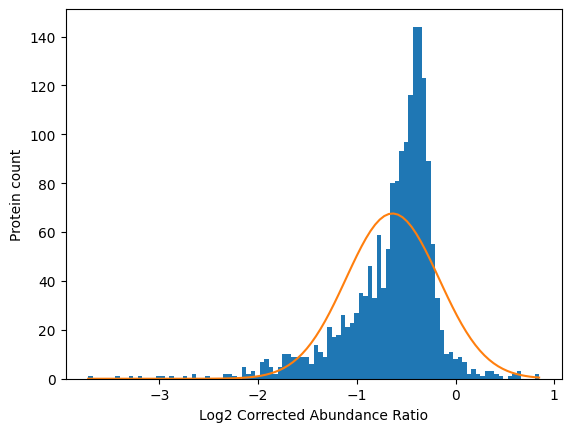

In [242]:
fig, ax = plt.subplots()
hist = ax.hist(log2, bins=100) # draw histogram
x = np.linspace(min(log2), max(log2), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(log2)*dx # scale accordingly
ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel("Protein count")
ax.plot(x, norm.pdf(x, np.mean(log2), np.std(log2))*scale) # compute theoritical PDF and draw it

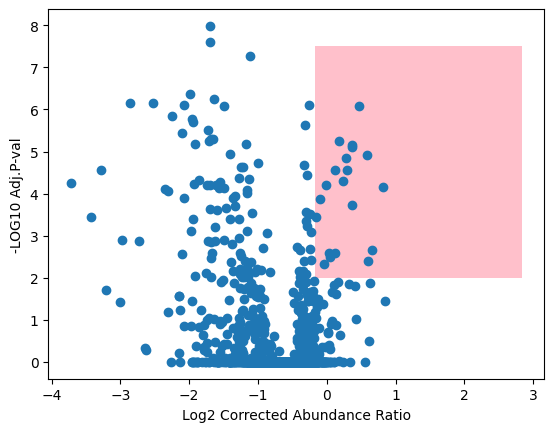

In [274]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

volc = df.iloc[:,[6, 4]]
moy = np.mean(log2)
ecart = np.std(log2)

# volc = volc[volc.apply(lambda x: (x['Log2 Corrected Abundance Ratio'] > moy + ecart) and (pow(10, -x['-LOG10 Adj.P-val']) > 0.01), axis=1)]
# volc.reset_index(drop=True, inplace=True)

ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel("-LOG10 Adj.P-val")

x_min = moy + ecart
y_min = 2
ax.add_patch(Rectangle((x_min, y_min), 3, 5.5, facecolor='pink'))
plt.scatter(volc['Log2 Corrected Abundance Ratio'], volc['-LOG10 Adj.P-val'])

In [ ]:
# 14 protéine surexprimé ou on regarde leurs termes GO

# dictionnaire de terme GO : liste de protéines
# Dans une loi hypergéométrique avec au >= k
# N taille du protéome
# K nombre de protéine avec le terme GO
# n nombre de protéine significatives
# k nombre de protéine significative avec le terme GO??
# hypergeom.pdf